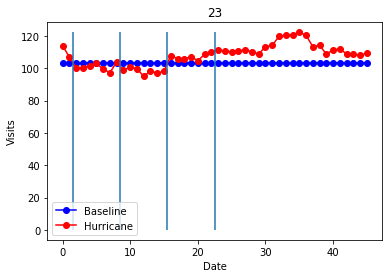

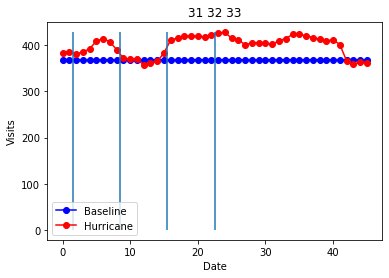

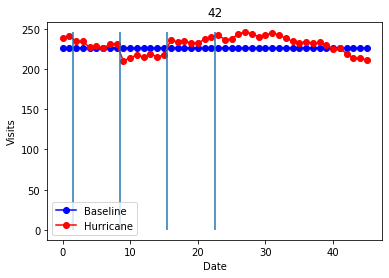

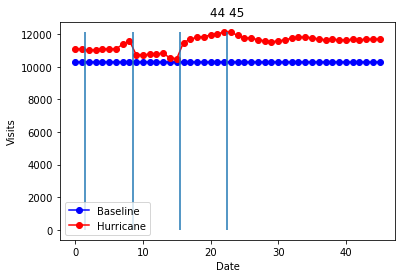

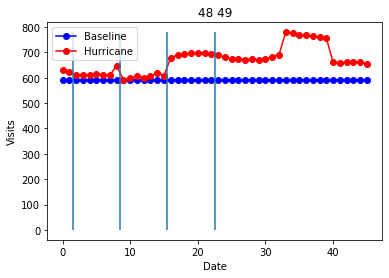

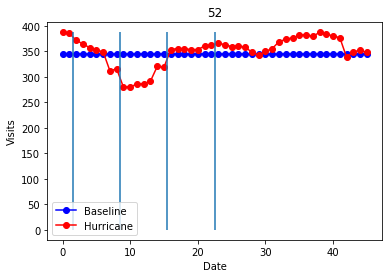

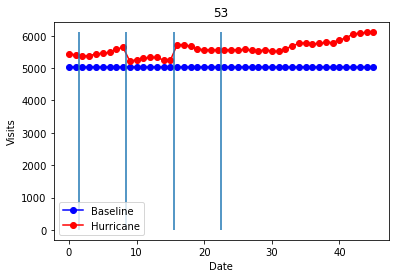

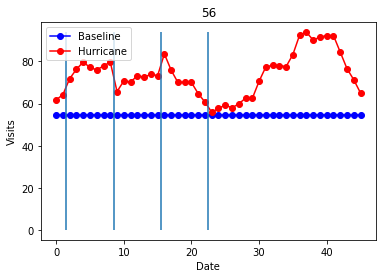

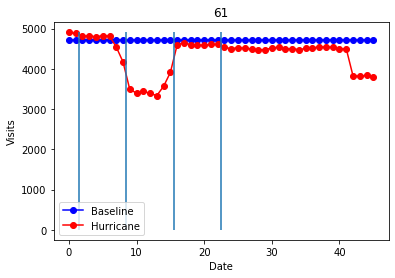

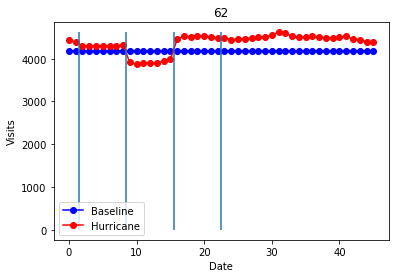

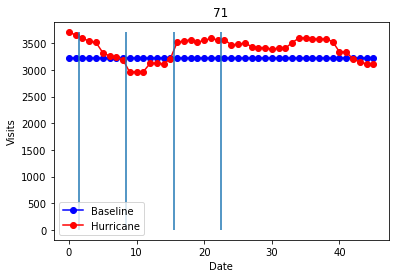

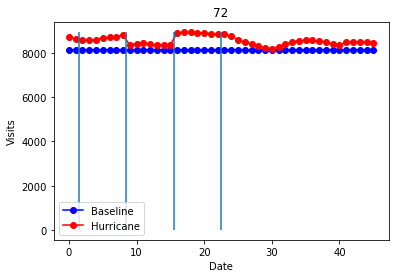

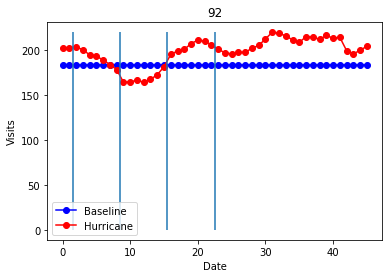

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cities: Panama_city, Panama_city_beach, Tallahassee, Pensacola
city = 'Pensacola'
data_baseline = pd.read_excel(city + '_baseline.xlsx','Sheet1')
data_hurricane = pd.read_excel(city + '_hurricane.xlsx','Sheet1')
data_extension = pd.read_excel(city + '_extension.xlsx','Sheet1')
data_baseline = data_baseline[['category','visits_by_day']]
data_hurricane = data_hurricane[['category','visits_by_day']]
data_extension = data_extension[['category','visits_by_day']]

#Change category
category = [[23],[31,32,33],[42],[44,45],[48,49],[52],[53],[56],[61],[62],[71],[72],[92]]

for k in range(len(category)):
    #Visits for baseline
    df_b = data_baseline[data_baseline['category'].isin(category[k])].reset_index()
    visits_a = [0] * 30
    for i in range(len(df_b)):
        visits_a = np.sum([visits_a, eval(df_b['visits_by_day'][i])], axis=0)
    visits_b = [np.mean(visits_a[2:])] * 46

    #Visits for hurricane
    df_h = data_hurricane[data_hurricane['category'].isin(category[k])].reset_index()
    df_e = data_extension[data_extension['category'].isin(category[k])].reset_index()
    visits_h, visits_e = [0] * 31, [0] * 30
    for i in range(len(df_h)):
        visits_h = np.sum([visits_h, eval(df_h['visits_by_day'][i])], axis=0)
    for i in range(len(df_e)):
        visits_e = np.sum([visits_e, eval(df_e['visits_by_day'][i])], axis=0)

    visits = list(visits_a[-6:]) + list(visits_h) + list(visits_e[0:15])
    df_visits = pd.DataFrame({'visits': visits}).rolling(7).mean()
    visits = df_visits['visits'].tolist()[6:]

    #Visualization
    plt.plot(range(46), visits_b, 'o-', label = 'Baseline', color = 'b')
    plt.plot(range(46), visits, 'o-', label = 'Hurricane', color = 'r')

    plt.vlines(1.5, 0, max(visits))
    plt.vlines(8.5, 0, max(visits))
    plt.vlines(15.5, 0, max(visits))
    plt.vlines(22.5, 0, max(visits))

    plt.xlabel('Date')
    plt.ylabel('Visits')
    plt.title(' '.join(map(str, category[k])))
    plt.legend()
    plt.savefig(' '.join(map(str, category[k])) + '.png')
    plt.show()